<a href="https://colab.research.google.com/github/anik-ghosh-au7/Projects/blob/master/Bitcoin_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/BTC-USD.csv", date_parser=True)
data.head()

,Date,Close
0,2017-01-01,998.325012
1,2017-01-02,1021.750000
2,2017-01-03,1043.839966
3,2017-01-04,1154.729980
4,2017-01-05,1013.380005


In [0]:
data.tail()

,Date,Close
1170,2020-03-16,5014.479980
1171,2020-03-17,5225.629395
1172,2020-03-18,5238.438477
1173,2020-03-19,6191.192871
1174,2020-03-20,6560.907227


In [0]:
data_training = data[data['Date'] <= '2019-12-31'].copy()
data_training.tail()

,Date,Close
1090,2019-12-27,7290.088379
1091,2019-12-28,7317.990234
1092,2019-12-29,7422.652832
1093,2019-12-30,7292.995117
1094,2019-12-31,7193.599121


In [0]:
data_testing = data[data['Date'] > '2019-12-31'].copy()
data_testing.head()

,Date,Close
1095,2020-01-01,7200.174316
1096,2020-01-02,6985.470215
1097,2020-01-03,7344.884277
1098,2020-01-04,7410.656738
1099,2020-01-05,7411.317383


In [0]:
training_data = data_training.drop(['Date'], axis=1)
training_data.head()

,Close
0,998.325012
1,1021.750000
2,1043.839966
3,1154.729980
4,1013.380005


In [0]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.0117827 ],
       [0.01303406],
       [0.0142141 ],
       ...,
       [0.35496915],
       [0.34804285],
       [0.34273314]])

In [0]:
X_train = []
Y_train = []
training_data.shape

(1095, 1)

In [0]:
for i in range(30, training_data.shape[0]):
  X_train.append(training_data[i-30:i])
  Y_train.append(training_data[i, 0])

In [0]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
Y_train

array([0.01029111, 0.01128579, 0.01250253, ..., 0.35496915, 0.34804285,
       0.34273314])

In [0]:
X_train.shape

(1065, 30, 1)

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [0]:
regressior = Sequential()
regressior.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units=60, activation='relu', return_sequences=True))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units=80, activation='relu', return_sequences=True))
regressior.add(Dropout(0.2))
regressior.add(LSTM(units=120, activation='relu'))
regressior.add(Dropout(0.2))
regressior.add(Dense(units=1))

In [0]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 30, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [0]:
regressior.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
regressior.fit(X_train, Y_train, epochs=20, batch_size=32)

Train on 1065 samples
Epoch 1/20
1065/1065 [==============================] - 6s 6ms/sample - loss: 0.0355
Epoch 2/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0074
Epoch 3/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0057
Epoch 4/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0061
Epoch 5/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0052
Epoch 6/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0050
Epoch 7/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0039
Epoch 8/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0042
Epoch 9/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0039
Epoch 10/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0035
Epoch 11/20
1065/1065 [==============================] - 3s 3ms/sample - loss: 0.0032
Epoch 12/20
1065/1065 [==================

In [0]:
past_30_days = data_training.tail(60)

In [0]:
df = past_30_days.append(data_testing, ignore_index=True)
df = df.drop(['Date'], axis=1)
df.head()

,Close
0,9324.717773
1,9235.354492
2,9412.612305
3,9342.527344
4,9360.879883


In [0]:
inputs = scaler.transform(df)
inputs

array([[0.45657711],
       [0.45180334],
       [0.46127242],
       [0.4575285 ],
       [0.45850889],
       [0.45352384],
       [0.42880752],
       [0.42927233],
       [0.44219696],
       [0.42629183],
       [0.42938345],
       [0.42898818],
       [0.42363722],
       [0.41209306],
       [0.41523247],
       [0.41668628],
       [0.40233294],
       [0.39682318],
       [0.38726758],
       [0.3667267 ],
       [0.34823423],
       [0.35364134],
       [0.33495082],
       [0.34019755],
       [0.34405645],
       [0.36079248],
       [0.35713014],
       [0.37305661],
       [0.36282063],
       [0.35505674],
       [0.34959166],
       [0.34949322],
       [0.34585475],
       [0.35633962],
       [0.36161157],
       [0.36210523],
       [0.36253833],
       [0.35380708],
       [0.34724821],
       [0.34400603],
       [0.3453793 ],
       [0.34679761],
       [0.33905116],
       [0.34052704],
       [0.32878423],
       [0.31318749],
       [0.34717786],
       [0.343

In [0]:
X_test = []
Y_test = []

In [0]:
for i in range(30, inputs.shape[0]):
  X_test.append(inputs[i-30:i])
  Y_test.append(inputs[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((110, 30, 1), (110,))

In [0]:
Y_pred = regressior.predict(X_test)

In [0]:
scaler.scale_

array([5.34198211e-05])

In [0]:
scale = 1/5.34198211e-05
scale

18719.643372223873

In [0]:
Y_pred = Y_pred*scale
Y_test = Y_test*scale

In [0]:
Y_pred

array([[6339.6934],
       [6414.391 ],
       [6485.3765],
       [6539.161 ],
       [6572.622 ],
       [6592.579 ],
       [6607.7065],
       [6621.6387],
       [6630.907 ],
       [6628.9272],
       [6611.751 ],
       [6578.6323],
       [6534.8027],
       [6483.5483],
       [6428.6304],
       [6368.8174],
       [6296.9834],
       [6229.807 ],
       [6178.6416],
       [6151.365 ],
       [6148.5146],
       [6175.0366],
       [6225.442 ],
       [6290.0947],
       [6356.4043],
       [6413.546 ],
       [6456.4775],
       [6484.3726],
       [6501.24  ],
       [6508.17  ],
       [6502.435 ],
       [6484.42  ],
       [6450.7236],
       [6412.278 ],
       [6381.251 ],
       [6365.6104],
       [6378.699 ],
       [6436.8   ],
       [6540.473 ],
       [6672.1836],
       [6818.539 ],
       [6961.682 ],
       [7091.106 ],
       [7195.6064],
       [7293.285 ],
       [7395.961 ],
       [7502.1704],
       [7610.1704],
       [7717.035 ],
       [7807.578 ],


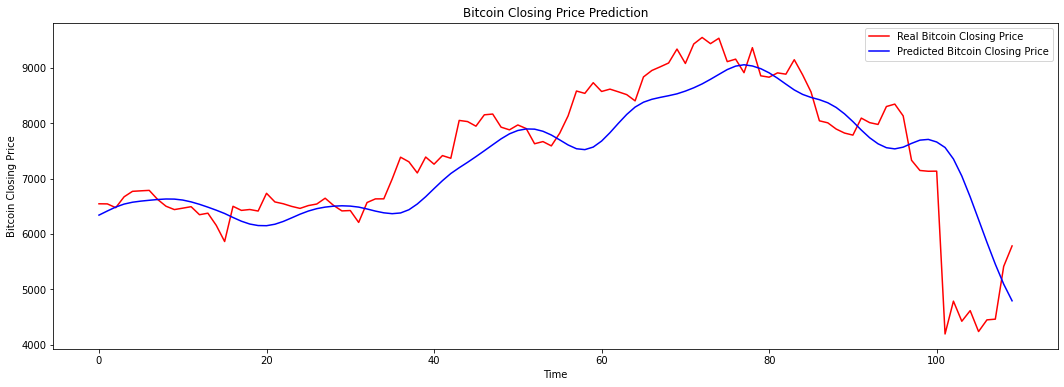

In [0]:
plt.figure(figsize=(18, 6))
plt.plot(Y_test, color='red', label='Real Bitcoin Closing Price')
plt.plot(Y_pred, color='blue', label='Predicted Bitcoin Closing Price')
plt.title('Bitcoin Closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Closing Price')
plt.legend()
plt.show()